The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


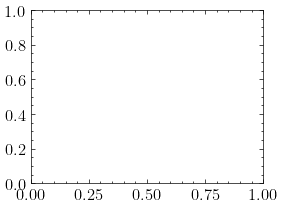

In [57]:
# Importing dependencies
%load_ext autoreload
%autoreload 2

import itertools
import yaml
import os
import pickle
import pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
import scienceplots

import logging

logging.getLogger('matplotlib').setLevel(logging.WARNING)

plt.style.use('science')

# exact textwidth I got from latex
textwidth = 6.00117/2
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio
plt.figure(figsize=(width, height))


# # Adjust tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)

plt.rcParams['axes.linewidth'] = 1.5
from clustercausal.experiments.ExperimentRunner import ExperimentRunner
from clustercausal.utils.Utils import *
from clustercausal.experiments.Utils import load_experiment_folder

In [58]:
# data = load_experiment_folder('clustercausal\experiments\_results_storage\ClusterPC_simulation_1')
data = pd.read_pickle('clustercausal\experiments\_results_dataframes_for_simulations\data_clusterPC_simulation_1.pkl')

In [59]:
data_all = data.copy()
prec_recall_metrics = ['base_adj_precision', 'cluster_adj_precision', \
              'base_adj_recall', 'cluster_adj_recall', \
                'base_adj_f1_score', 'cluster_adj_f1_score']

In [60]:
indep_test_metrics = ['Base indep tests', 'C-PC indep tests']
dist_metrics = ['base_base_shd', 'cluster_cluster_shd', 'empty_graph_shd']

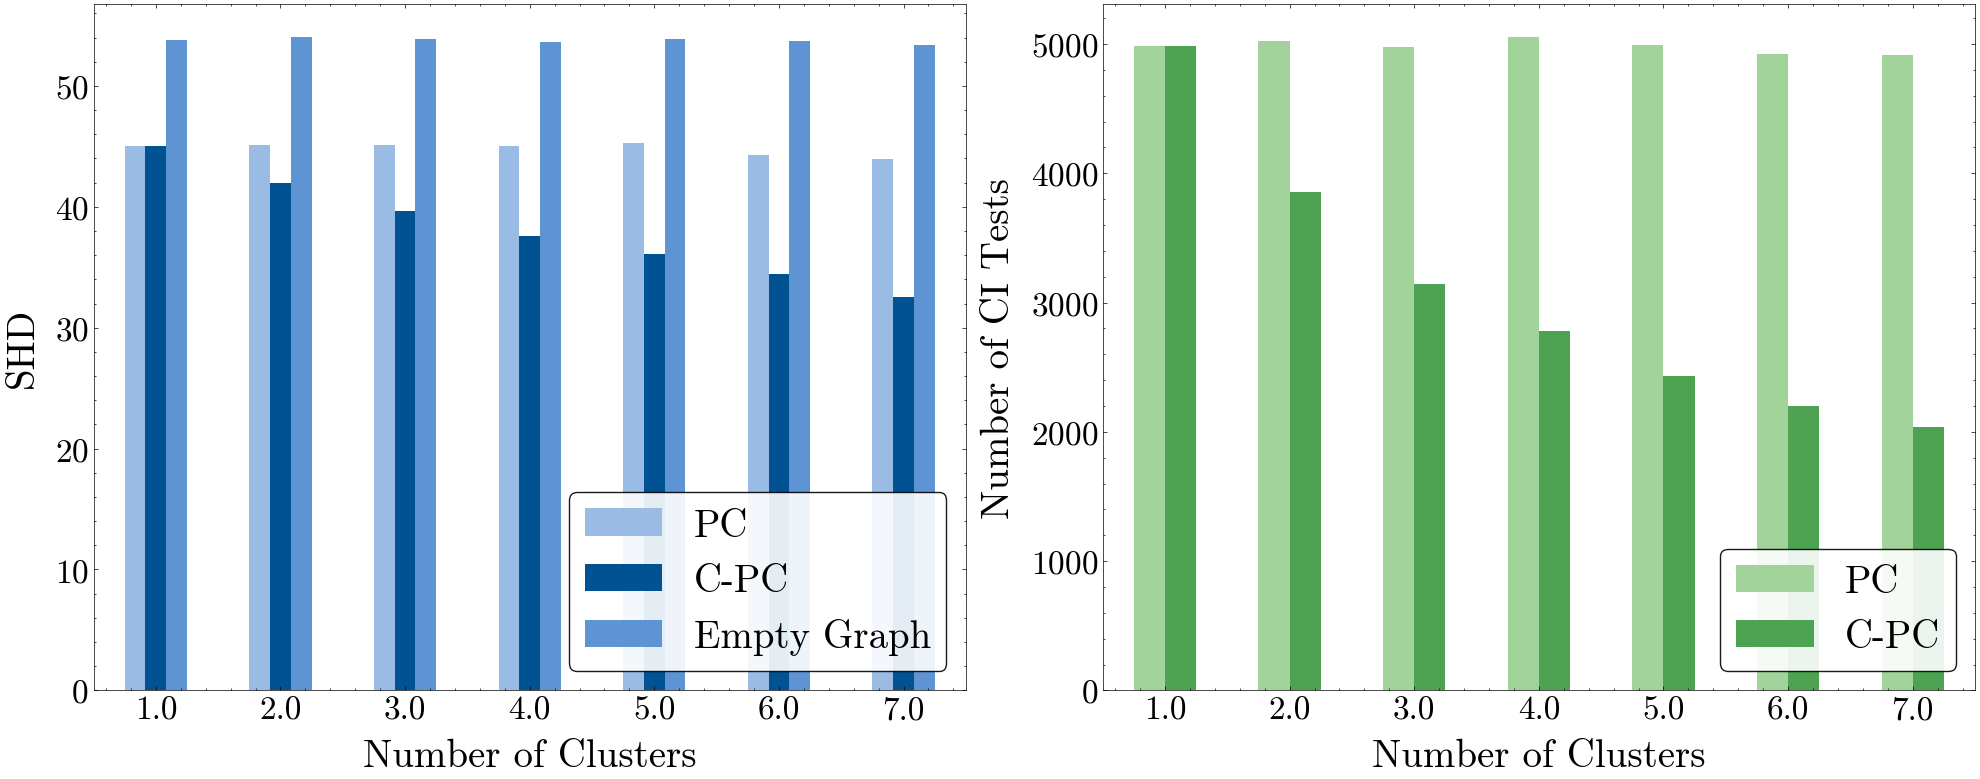

In [61]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import scienceplots

# Use the 'science' style from scienceplots
plt.style.use(['science', 'no-latex'])  # 'no-latex' avoids LaTeX processing for quicker rendering

# Define colors for each plot
colors_shd = ['#9ABCE4', '#005293', '#5E94D4']  # Blue shades for SHD plot
colors_ci_tests = ['#A2D39A', '#4DA351', '#2F7D34']  # Green shades for CI tests plot
# colors_ci_tests = ['#C7D97D', '#7D922A']  # Green shades for CI tests plot

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))  # Side-by-side subplots

# First plot - SHD for different numbers of clusters
data_all.groupby('n_clusters')[dist_metrics].mean().plot(kind='bar', ax=ax1, color=colors_shd)
# ax1.set_title('SHD for Different Numbers of Clusters', fontsize=20, weight='bold')
ax1.set_xlabel('Number of Clusters', fontsize=28, labelpad=10)
ax1.set_ylabel('SHD', fontsize=28, labelpad=10)
ax1.tick_params(axis='both', which='major', labelsize=24)
ax1.tick_params(axis='x', which='major', labelsize=24, rotation=0)
label_names_shd = ['PC', 'C-PC', 'Empty Graph']
legend1 = ax1.legend(label_names_shd, loc='lower right', fontsize=28, frameon=True)
legend1.get_frame().set_facecolor('white')  # White background for the legend
legend1.get_frame().set_edgecolor('black')  # Black border for clarity
legend1.get_frame().set_alpha(0.9)  # Slight transparency

# Second plot - Number of CI tests needed for different numbers of clusters
data_all.groupby('n_clusters')[indep_test_metrics].mean().plot(kind='bar', ax=ax2, color=colors_ci_tests)
# ax2.set_title('Number of CI Tests Needed for Different Numbers of Clusters', fontsize=20, weight='bold')
ax2.set_xlabel('Number of Clusters', fontsize=28, labelpad=10)
ax2.set_ylabel('Number of CI Tests', fontsize=28, labelpad=10)
ax2.tick_params(axis='both', which='major', labelsize=24)
ax2.tick_params(axis='x', which='major', labelsize=24, rotation=0)
label_names_ci = ['PC', 'C-PC']
legend2 = ax2.legend(label_names_ci, loc='lower right', fontsize=28, frameon=True)
legend2.get_frame().set_facecolor('white')  # White background for the legend
legend2.get_frame().set_edgecolor('black')  # Black border for clarity
legend2.get_frame().set_alpha(0.9)  # Slight transparency

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('imgs/combined_shd_ci_tests_clusters_diagram.pdf', bbox_inches='tight')
plt.show()


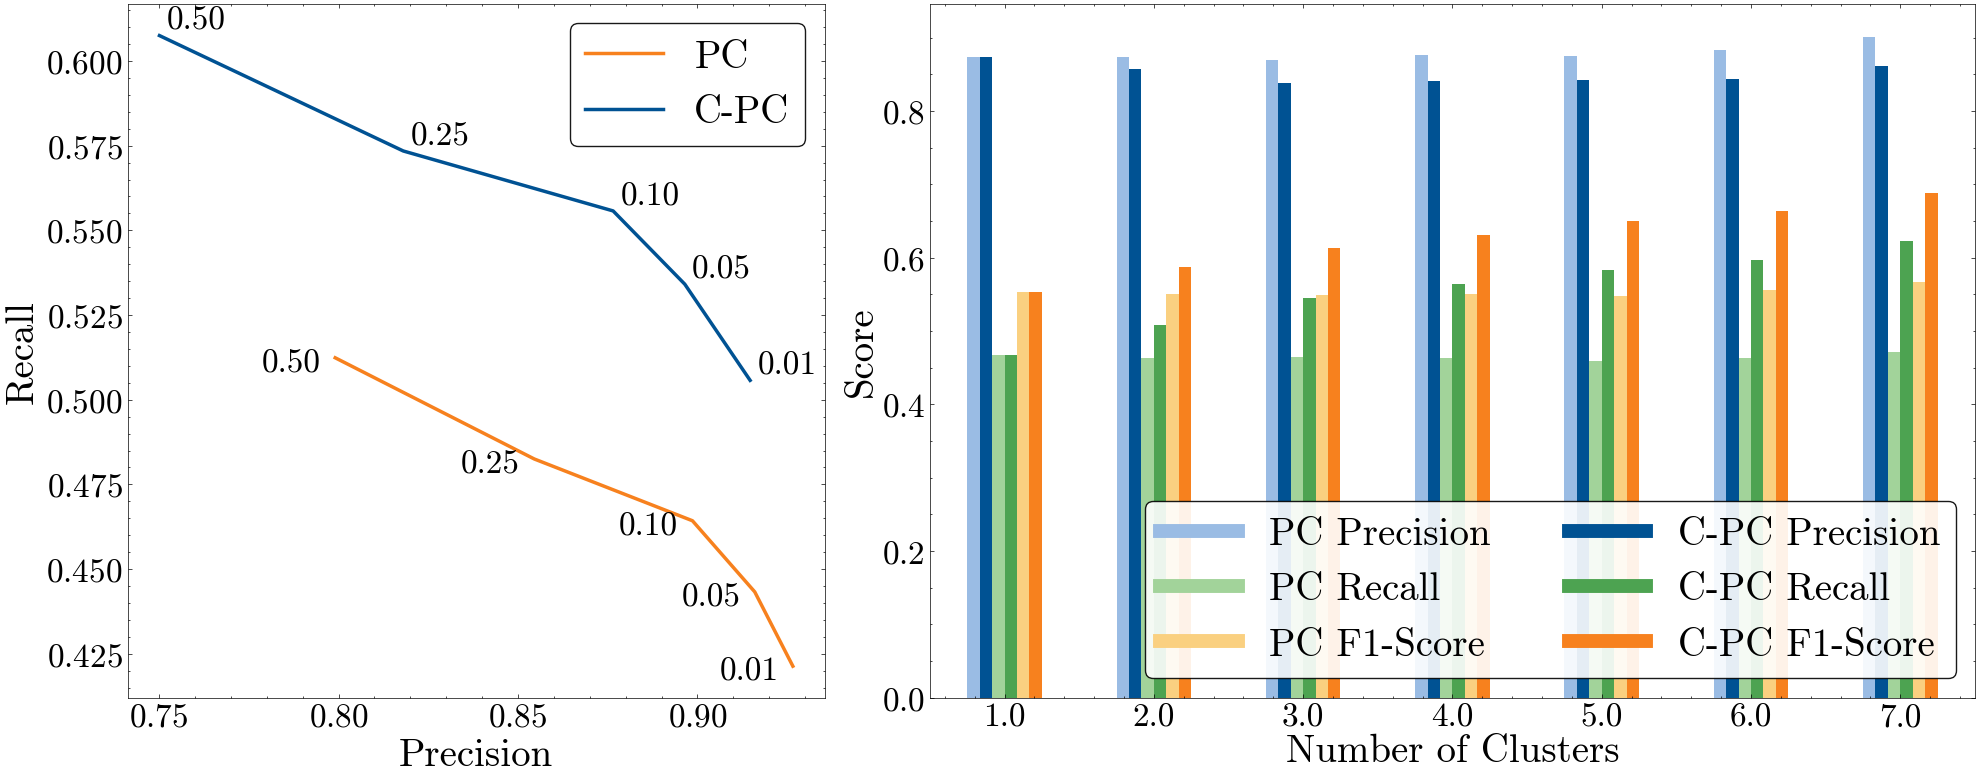

In [63]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
plt.style.use(['science', 'no-latex'])

# Colors for the plots
colors_pr = ['#F7811E', '#005293']  # Dark orange and dark blue for Precision-Recall curve
# light blue and dark blue
# colors_pr = ['#9ABCE4', '#005293']  
colors_bar = ['#9ABCE4', '#005293', '#C7D97D', '#7D922A', '#FAD080', '#F7811E']  # TUM Colors
# use '#A2D39A', '#4DA351' as greens instead of '#C7D97D', '#7D922A'
colors_bar = ['#9ABCE4', '#005293', '#A2D39A', '#4DA351', '#FAD080', '#F7811E']  # TUM Colors

# Create the figure and specify gridspec for unequal subplot widths
fig = plt.figure(figsize=(20, 8))
gs = GridSpec(1, 2, width_ratios=[2, 3])  # 40% for ax1 and 60% for ax2

# First Plot: Precision-Recall Curve for different alpha values
ax1 = fig.add_subplot(gs[0])
grouped_data = data.groupby('alpha')[prec_recall_metrics].mean()

# Plot for PC with dark orange and thicker line
ax1.plot(grouped_data['base_adj_precision'], grouped_data['base_adj_recall'], color=colors_pr[0], label='PC', linewidth=2.5)
for alpha, x, y in zip(grouped_data.index, grouped_data['base_adj_precision'], grouped_data['base_adj_recall']):
    offset = 0.004
    ax1.text(x - offset, y - offset, f'{alpha:.2f}', fontsize=24, ha='right')

# Plot for C-PC with dark blue and thicker line
ax1.plot(grouped_data['cluster_adj_precision'], grouped_data['cluster_adj_recall'], color=colors_pr[1], label='C-PC', linewidth=2.5)
for alpha, x, y in zip(grouped_data.index, grouped_data['cluster_adj_precision'], grouped_data['cluster_adj_recall']):
    offset = 0.002
    ax1.text(x + offset, y + offset, f'{alpha:.2f}', fontsize=24, ha='left')

# Set labels and style the legend for ax1
ax1.set_xlabel('Precision', fontsize=28)
ax1.set_ylabel('Recall', fontsize=28)
ax1.tick_params(axis='both', which='major', labelsize=24)

# Legend styled like the second plot but positioned at the top right
legend = ax1.legend(fontsize=28, loc='upper right', frameon=True, ncol=1)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_alpha(0.9)

# Second Plot: Bar plot for Precision, Recall, and F1-Score for Different Numbers of Clusters
ax2 = fig.add_subplot(gs[1])
data_all.groupby('n_clusters')[prec_recall_metrics].mean().plot(kind='bar', ax=ax2, color=colors_bar)

# Label enhancements for ax2
ax2.set_xlabel('Number of Clusters', fontsize=28, labelpad=1)
ax2.set_ylabel('Score', fontsize=28, labelpad=1)
ax2.tick_params(axis='both', which='major', labelsize=24)
ax2.tick_params(axis='x', which='major', labelsize=24, rotation=0)

# Define the new order in `label_names` for ax2 legend
label_names = ['PC Precision', 'PC Recall', 'PC F1-Score', 'C-PC Precision', 'C-PC Recall', 'C-PC F1-Score']
label_colors = {
    'PC Precision': '#9ABCE4', 'PC Recall': '#C7D97D', 'PC F1-Score': '#FAD080',
    'C-PC Precision': '#005293', 'C-PC Recall': '#7D922A', 'C-PC F1-Score': '#F7811E'
}
# update label_ colors
label_colors = {
    'PC Precision': '#9ABCE4', 'PC Recall': '#A2D39A', 'PC F1-Score': '#FAD080',
    'C-PC Precision': '#005293', 'C-PC Recall': '#4DA351', 'C-PC F1-Score': '#F7811E'
}

colored_handles = [plt.Line2D([0], [0], color=label_colors[label], lw=10) for label in label_names]
legend = ax2.legend(colored_handles, label_names, loc='lower right', fontsize=28, frameon=True, ncol=2)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_alpha(0.9)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('imgs/combined_prec_recall_clusters_diagram.pdf', bbox_inches='tight')
plt.show()
